In [131]:
import ROOT as r
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
import pickle
import spliland
import importlib
import random
import fclParse
from scipy import stats
from sklearn.metrics import classification_report, confusion_matrix
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [132]:
directory = './template_data_v2/set_1/'

In [133]:
tf.config.run_functions_eagerly(True)

## Intro

The purpose of this notebook is to make a second attempt at a neural network, following along with what was described in the paper "Deep Learning Based Pulse Shape Analysis for GERDA" by Philipp Holl in 2017. This algorithm consists of an autoencoder, decoder, and then classifier.

I am also following this guide: https://keras.io/examples/timeseries/timeseries_anomaly_detection/ for the implementation of the layers described in the paper into python

### Prep the data

In [135]:
n_points = 4000

with open(directory + 'x.data', 'rb') as xFile:
    biggestX = pickle.load(xFile)
    x_train = []
    x_test = []
    for x in biggestX[:n_points]:
        x_train.append(x)
    for x in biggestX[n_points:]:
        x_test.append(x)
    xFile.close()

with open(directory + 'y.data', 'rb') as yFile:
    biggestY = pickle.load(yFile)
    y_train = biggestY[:n_points]
    y_test = biggestY[n_points:]
    yFile.close()
    
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [136]:
X_train = np.reshape(x_train, (n_points, 21816, 1))
Y_train = np.reshape(y_train, (n_points, 1))

In [137]:
X_train.shape

(4000, 21816, 1)

In [33]:
X_train

array([[[-2.56401213],
        [ 5.45288027],
        [ 1.50660863],
        ...,
        [-1.29995602],
        [-1.26773059],
        [ 5.85253821]],

       [[-1.36441837],
        [ 7.8328658 ],
        [ 5.07596373],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ...,
        [ 1.80412268],
        [ 0.60695902],
        [-1.83547117]],

       ...,

       [[-0.71470354],
        [-0.90348691],
        [ 4.88418815],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ...,
        [-8.75419927],
        [ 5.47735899],
        [ 0.00878131]]])

In [65]:
Y_train

array([[3],
       [3],
       [3],
       [1],
       [1],
       [2],
       [3],
       [2],
       [2],
       [2],
       [1],
       [1],
       [3],
       [1],
       [1],
       [3],
       [3],
       [4],
       [2],
       [1],
       [1],
       [1],
       [4],
       [3],
       [1],
       [2],
       [3],
       [3],
       [3],
       [2],
       [4],
       [1],
       [2],
       [4],
       [3],
       [2],
       [3],
       [1],
       [4],
       [4],
       [1],
       [3],
       [2],
       [3],
       [4],
       [1],
       [1],
       [4],
       [3],
       [1],
       [4],
       [4],
       [4],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [4],
       [3],
       [4],
       [3],
       [4],
       [1],
       [1],
       [1],
       [2],
       [3],
       [4],
       [4],
       [3],
       [2],
       [1],
       [1],
       [3],
       [4],
       [1],
       [4]])

### Classifier

In [162]:
classifier_model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(21816,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu')
])

In [163]:
classifier_model.compile(optimizer = 'adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [164]:
print(X_train.shape)
print(Y_train.shape)

(4000, 21816, 1)
(4000, 1)


In [165]:
classifier_history = classifier_model.fit(X_train,
                                          Y_train,
                                          epochs=20)

Epoch 1/20
125/125 [==============================] - 4s 34ms/step - loss: 1.9553 - accuracy: 0.4055
Epoch 2/20
125/125 [==============================] - 4s 32ms/step - loss: 1.5407 - accuracy: 0.5445
Epoch 3/20
125/125 [==============================] - 5s 37ms/step - loss: 1.0250 - accuracy: 0.6125
Epoch 4/20
125/125 [==============================] - 5s 38ms/step - loss: 0.6057 - accuracy: 0.7495
Epoch 5/20
125/125 [==============================] - 5s 44ms/step - loss: 0.4752 - accuracy: 0.8150
Epoch 6/20
125/125 [==============================] - 5s 43ms/step - loss: 0.3466 - accuracy: 0.8740
Epoch 7/20
125/125 [==============================] - 5s 39ms/step - loss: 0.3556 - accuracy: 0.8700
Epoch 8/20
125/125 [==============================] - 5s 36ms/step - loss: 0.2176 - accuracy: 0.9265
Epoch 9/20
125/125 [==============================] - 6s 49ms/step - loss: 0.1360 - accuracy: 0.9560
Epoch 10/20
125/125 [==============================] - 6s 46ms/step - loss: 0.1147 - accura

### Performance Stats

No handles with labels found to put in legend.
No handles with labels found to put in legend.


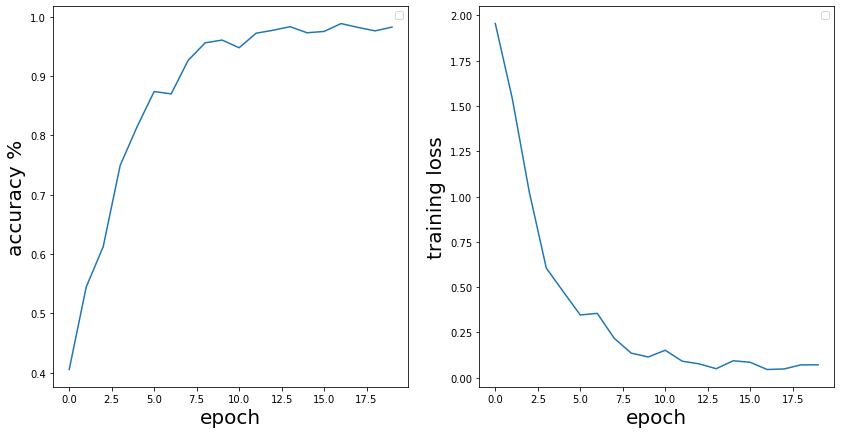

In [166]:
fig, ax = plt.subplots(1,2);
fig.set_size_inches(14,7);

ax[0].plot(classifier_history.history['accuracy'])

ax[0].set_xlabel("epoch", fontsize=20)
ax[0].set_ylabel("accuracy %", fontsize=20)
ax[0].legend()

ax[1].plot(classifier_history.history['loss'])

ax[1].set_xlabel("epoch", fontsize=20)
ax[1].set_ylabel("training loss", fontsize=20)
ax[1].legend()

In [167]:
Y_pred = classifier_model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

matrix = confusion_matrix(y_test, y_pred, normalize='true', labels=[0,1,2,3,4,5,6])

In [168]:
y_pred

array([1, 1, 3, ..., 1, 3, 1])

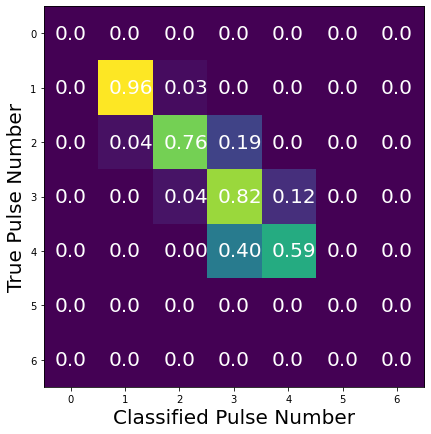

In [169]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(7,7)

labels = ['0', '1', '2', '3', '4', '5', '6']

grid = np.array(matrix)
im = ax.imshow(grid)

for k in range (0, len(grid)):
        for l in range (0, len(grid[0])):
            ax.text(l-0.3, k+0.1, str(grid[k][l])[:4], size=20, color='white')
            
ax.set_xticklabels([''] + labels);
ax.set_yticklabels([''] + labels);

ax.set_ylabel('True Pulse Number', fontsize=20);
ax.set_xlabel('Classified Pulse Number', fontsize=20);

#ax.set_title("with autoencoder", fontsize=20)
